In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as stats
import matplotlib.pyplot as plt 

# Задания для самостоятельного решения

#### 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

In [2]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)


Это 2 независимые выборки. Воспользуемся критерием Манна-Уитни  
**Гипотеза Н0**: выборки статистически не различаются  
**Гипотеза Н1**: выборки статистически различаются

In [3]:
from scipy.stats import mannwhitneyu
alpha = 0.05 # возьмем принятый уровень значимости
result = mannwhitneyu(A, B)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, выборки статистически различаются => они не принадлежат 1му множеству')
else:
    print('Не отвергаем нулевую гипотезу')

MannwhitneyuResult(statistic=4343.0, pvalue=0.054347680446611354)
Не отвергаем нулевую гипотезу


Нельзя на этом уроне значимости сделать вывод об эффективности препарата

#### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - те же люди, но без препарата.

B - выборка получающая препарат B

In [4]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)


Здесь речь идет об одной и той же группе людей, это зависимые выборки. Воспользуемся критерием Уилкоксона  
**Гипотеза Н0**: выборки статистически не различаются  
**Гипотеза Н1**: выборки статистически различаются

In [5]:
from scipy.stats import wilcoxon
result = wilcoxon(A, B)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, выборки статистически различаются => они не принадлежат 1му множеству')
else:
    print('Не отвергаем нулевую гипотезу')

WilcoxonResult(statistic=1930.0, pvalue=0.04077572901549266)
Отвергаем нулевую гипотезу, выборки статистически различаются => они не принадлежат 1му множеству


А тут, видимо, мы можем говорить, что препарат эффективен, несмотря на то, что что выборки из этого и предыдущего задания по сути одинаковые и отличаются только тем, что здесь мы считаем их зависимыми.

#### 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой? 


water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

Сформулируем гипотезы:  
**Гипотеза Н0**: распределения статистически не различаются (значит, эффекта нет)  
**Гипотеза Н1**: распределения статистически различаются (эффект есть)

In [6]:
from scipy.stats import f_oneway

water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

F, p = f_oneway(water, nutri, mineral) 

alpha = 0.05
print(F, p) 

if p > alpha:
    print('Не отвергаем нулевую гипотезу, одинаковые распределения')
else:
    print('Отвергаем нулевую гипотезу, разные распределения')


12.525963044834192 2.9240047906326866e-05
Отвергаем нулевую гипотезу, разные распределения


Значит, хотя бы одно из распределений отлично от 2х других. Чтобы показать, что это распределение именно с удобрением, визуализируем данные. 

In [7]:
data = pd.concat([pd.DataFrame({'nutri': nutri, 'mineral': mineral}), pd.DataFrame({'water': water})], axis=1)
data

,nutri,mineral,water
0,1,2,1.0
1,2,1,2.0
2,4,1,3.0
3,6,3,4.0
4,5,2,2.0
5,6,4,4.0
6,7,2,2.0
7,5,4,4.0
8,4,5,5.0
9,5,4,2.0


<AxesSubplot:>

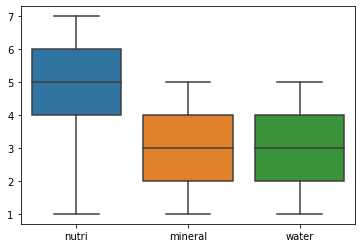

In [8]:
sns.boxplot(data=data)

По графику видно, что группы с водой и минералкой внешне не отличаются, зато явно отличается группа с удобрениями. Так же тест показал, что у нас есть статистически значимая разница между группами. Делаем вывод, что эффект от удобрений есть

# Cookie Cats

Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=400></p>
 

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.

Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=400></p>


# Данные A/B тестирования

In [9]:
data = pd.read_csv('cookie_cats.csv') 
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

userid - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

# Задание: провести анализ данных и сделать выводы о месте установки ворот. 
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. 

In [10]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


На данном этапе мы не можем судить об эффективности той или иной стратегии игры. Здесь мы можем сказать, только то, что группы для тестирования набраны почти равномерно, с небольшим перевесом в пользу гейт 40.

<AxesSubplot:>

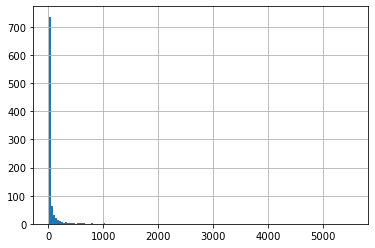

In [11]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=150)  # попробуйте поварировать bins=150

#Ваши выводы

График получается не очень наглядным из-за масштаба, однако можно с уверенностью сказать, что большинство пользователей проводят в игре всего несколько раундов или же не сыграли ни одного раунда. В то же время существуют пользователи, которые отыграли около 5000 раундов. Так же мы можем сказать, что игроков, отыгравших интересующий нас диапазон раундов - 30-40, так же достаточно много.

Text(0.5, 0, '№ Игрового раунда')

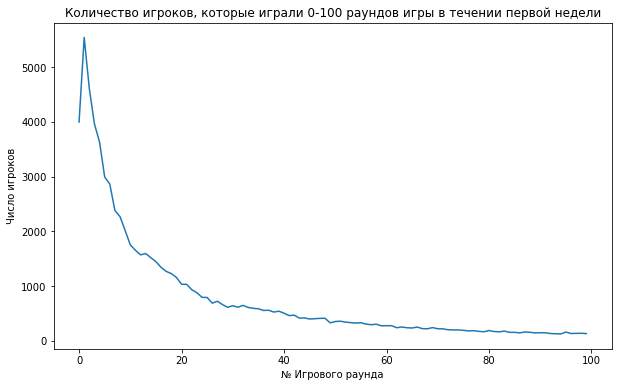

In [12]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("Количество игроков, которые играли 0-100 раундов игры в течении первой недели")
ax.set_ylabel("Число игроков")
ax.set_xlabel('№ Игрового раунда')

<AxesSubplot:ylabel='Density'>

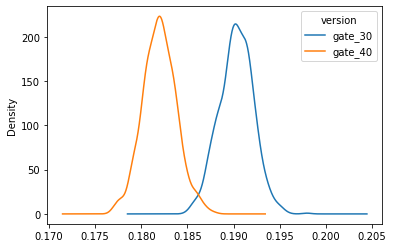

In [13]:
# Creating an list with bootstrapped means for each AB-group
boot_7d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_7d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_7d = pd.DataFrame(boot_7d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_7d.plot(kind='density')

In [14]:
boot_7d.head()

version,gate_30,gate_40
retention_7,0.186217,0.184276
retention_7,0.187197,0.183357
retention_7,0.192843,0.182120
retention_7,0.187698,0.182253
retention_7,0.194158,0.183614


In [15]:
boot_7d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, retention_7 to retention_7
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gate_30  1000 non-null   float64
 1   gate_40  1000 non-null   float64
dtypes: float64(2)
memory usage: 23.4+ KB


In [21]:
# Ваши выводы?

Мы получили 2 распределения выборочных средних для каждой группы. Если сравнивать пики 2х графиков, то получается, что наиболее вероятное среднее значение для гейт 30 чуть меньше, но вероятность этого значения чуть больше, чем для гейт 40. Окончательные выводы по эффективности того или иного варианта сделаем позднее. 

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [ ]:
# from scipy.stats import f_oneway 
# from scipy.stats import wilcoxon
# from scipy.stats import mannwhitneyu
# #import scipy.stats as stats

# # Интерпретируем
# alpha = 0.05   # Уровень значимости
# if p > alpha:
#     print('Одинаковые распределения (не отвергаем H0)')
# else:
#     print('Разные распределения (отвергаем H0)')


# # Ваш код. 
#  

В целом, исходя из материалов предыдущей лекции мне кажется логичным здесь использовать критерий хи-квадрат. Мы исследуем категориальные переменные (вернулся пользователь или нет), сравнивая их распределение для групп А и В (гейт 30 и гейт 40). Из имеющихся данных легко построить таблицы сопряженности для наших признаков retention_1 и retention_7

Сформулируем гипотезы:  
**Гипотеза Н0**: между вариантами А и В нет значимых различий  
**Гипотеза Н1**: вариант В значимо лучше или значимо хуже варианта А

Если мы подтвердим альтернативную гипотезу, то можно будет провести следующее исследование, чтобы оценить какой именно эффект, положительный или отрицательный, окажет перенос гейта на уровень 40

In [16]:
# для retention_1
crosstab_1 = pd.crosstab(data['version'], data['retention_1'])
crosstab_1

retention_1,False,True
version,,
gate_30,24666,20034
gate_40,25370,20119


In [17]:
from scipy.stats import chi2_contingency
chi2, pvalue, dof, expctd = chi2_contingency(crosstab_1)

print('P-value: %0.4f' %pvalue)

alpha = 0.05  
if pvalue > alpha:
    print('не отвергаем H0')
else:
    print('отвергаем H0, принимаем Н1')

P-value: 0.0755
не отвергаем H0


In [18]:
# Можем проверить другим тестом. Исследуем категориальные данные на 2х независимых (разные пользователи) выорках -> попробуем
# тест Манна-Уитни
from scipy.stats import mannwhitneyu
tab = crosstab_1.T
stat, p = mannwhitneyu(tab['gate_30'], tab['gate_40']) 
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if pvalue > alpha:
    print('не отвергаем H0')
else:
    print('отвергаем H0, принимаем Н1')

Statistics=1.000, p=0.349
не отвергаем H0


Не можем отвергнуть Н0. Т.е нельзя сказать, что перенос ворот на уровень 40 окажет значимый эффект. 

In [19]:
# для retention_7
crosstab_7 = pd.crosstab(data['version'], data['retention_7'])
crosstab_7

retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


In [20]:
chi2, pvalue, dof, expctd = chi2_contingency(crosstab_7)

print('P-value: %0.4f' %pvalue)

alpha = 0.05   
if pvalue > alpha:
    print('не отвергаем H0')
else:
    print('отвергаем H0, принимаем Н1')

P-value: 0.0016
отвергаем H0, принимаем Н1


Получили, что для возврата через 1 день тест показал, что нет значимого различия между вариантами А и В. Но какой-то эффект от переноса ворот проявляется на возврате через 7 дней. Скорее всего этот эффект - отрицательный, если мы посмотрим на crosstab_7, увидим, что при примерно равных группах отток пользователей на гейт 40 больше, а приток меньше.

In [21]:
 pd.crosstab(data['version'], data['retention_7'], normalize=True)

retention_7,False,True
version,,
gate_30,0.401357,0.094269
gate_40,0.412578,0.091796


По идее, можно воспользоваться имеющимся в примере датафреймом из выборочных средних. По центральной предельной теореме мы считаем распределения выборочных средних нормальными и такую же картинку наблюдаем на графике. Значит разность этих 2х распределений тоже будет распределена нормально. Если мы предполагаем, что значимой разницы между вариантами А и В нет, значит пик распределения разниц будет около 0. Если А лучше В, то при вычитании (А - В) больше будет положительных разниц, и пик будет смещен от 0 в сторону положительных чисел (и этот вариант мы предполагаем увидеть). Если В все же лучше А, то при вычитании (А - В) больше будет отрицательных разниц, и пик буде смещен отрицательно  

In [22]:
boot_7d['difference'] = boot_7d['gate_30'] - boot_7d['gate_40']
boot_7d.head()

version,gate_30,gate_40,difference
retention_7,0.186217,0.184276,0.001940
retention_7,0.187197,0.183357,0.003840
retention_7,0.192843,0.182120,0.010723
retention_7,0.187698,0.182253,0.005446
retention_7,0.194158,0.183614,0.010544


<AxesSubplot:ylabel='Density'>

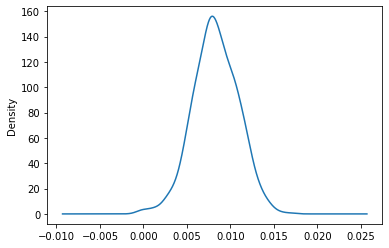

In [23]:
boot_7d['difference'].plot(kind='density')

Пик явно смещен направо от 0, то есть эффект от А значимо лучше. Таким образом, можно сделать вывод, что смещение ворот на 40 уровень нецелесообразно ни в краткосрочной перспективе, ни в долгосрочной